Task 2:

Cluster individuals using DBSCAN from this CSV file, income.csv (you can load it directly to pandas, just using this link). Using only the
Age and Income($) features: Preprocess the data appropriately for clustering.
Apply the DBSCAN algorithm to identify clusters and outliers. Use
min_samples = 4 and choose a suitable eps = 1.4. Visualize the clusters
and label the outliers.

In [11]:
import pandas as pd
df = pd.read_csv('income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Select Features

In [12]:
df_selected_features = df[['Age', 'Income($)']]
print("Selected features DataFrame head:")
print(df_selected_features.head())

Selected features DataFrame head:
   Age  Income($)
0   27      70000
1   29      90000
2   29      61000
3   28      60000
4   42     150000


Preprocess data

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply fit_transform to the selected features
X_scaled = scaler.fit_transform(df_selected_features)

print("Features normalized successfully.")
print(f"Shape of normalized features (X_scaled): {X_scaled.shape}")

Features normalized successfully.
Shape of normalized features (X_scaled): (22, 2)


Apply DBSCAN Clustering

In [14]:
from sklearn.cluster import DBSCAN

# Create an instance of the DBSCAN model with min_samples=4 and eps=1.4
dbscan = DBSCAN(min_samples=4, eps=1.4)

# Fit the DBSCAN model to the X_scaled data
dbscan.fit(X_scaled)

# Store the cluster labels
labels = dbscan.labels_

print("DBSCAN algorithm applied successfully.")
print(f"Cluster labels generated: {labels}")

DBSCAN algorithm applied successfully.
Cluster labels generated: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Visualize Clusters and Outliers

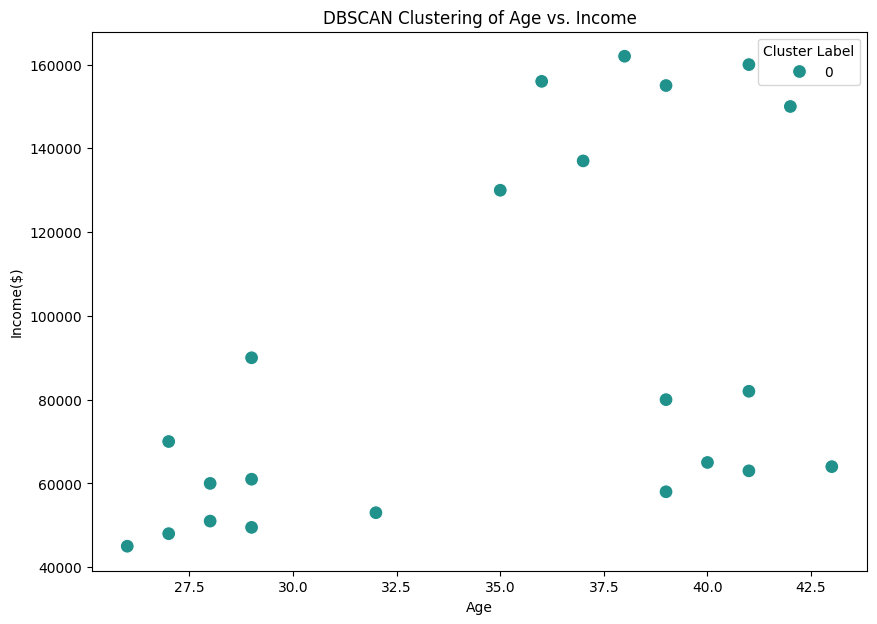

Scatter plot of clusters and outliers created successfully.
Number of clusters found: 1
Number of outliers found: 0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Income($)', hue=labels, palette='viridis', style=labels, s=100, data=df_selected_features)

# Label the axes
plt.xlabel('Age')
plt.ylabel('Income($)')

# Add a title
plt.title('DBSCAN Clustering of Age vs. Income')

# Add a legend
plt.legend(title='Cluster Label')
# plt.savefig('dbscan_clusters.pdf')

# Display the plot
plt.show()

print("Scatter plot of clusters and outliers created successfully.")

# Count the number of unique clusters, excluding outliers (-1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count the number of outliers
n_outliers = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of outliers found: {n_outliers}")